In [1]:
using Luxor, Plots

Use the Julia library Luxor to generate some random walk graphs with turtles. Demonstrate how you can use Simplex (similar to Perlin) noise.

This post was inspired by a chapter in The Nature of Code. [Check it out!](https://natureofcode.com/book/introduction/)

# Random walks

Random walk is a stochastic process that describe a path formed by random steps. Imagine we have a 0-D creature point that lives on a 1-D line. The creature randomly looks around for food to the left and right. At every timestep, the creature has a 50% chance of moving left and a 50% chance of moving right. Let's sample a random number $x$ from a uniform distribution between 0 and 1. If $x$ is greater than 0.5, then we move right. Otherwise, we move left.

$$
f(x) = \begin{cases}
  \textrm{move right}, & \mbox{if } x \ge 0.5 \\
  \textrm{move left},  & \mbox{otherwise}  
\end{cases}
$$

Illustrated, this looks like:

![](images/1d-uniform.png)

We will use the Julia library Luxor to help create some simple vector animations with turtles.

In [2]:
movie = Movie(600, 22, "turtle");
nframes = 1e3
stepsize = 2
pathname = "plots/1d-uniform.gif"

🐢 = Turtle()

function frame(scene, framenumber)
    global 🐢
    Pencolor(🐢, "cyan")
    if rand(1)[1] > 0.5
        # Go right one step
        Orientation(🐢, 0)
        Forward(🐢, stepsize)
    else
        # Go left one step
        Orientation(🐢, 180)
        Forward(🐢, stepsize)
    end
    Circle(🐢, 10)
end;

function backdrop(scene, framenumber)
    background("midnightblue")
end;

Luxor.animate(
    movie, [
        Scene(movie, backdrop, 1:nframes),
        Scene(
            movie,
            frame,
            1:nframes,
        ),
    ],
    pathname=pathname,
    creategif=true,
    framerate=60,
);
display(MIME("text/html"), "<img src=\"" * pathname * "\">")

┌ Info: Frames for animation "turtle" are being stored in directory: 
│ 	 /tmp/tmpBG5XwV
└ @ Luxor /home/suzil/.julia/packages/Luxor/PU5Pi/src/animate.jl:170
┌ Info: ... 1000 frames saved in directory:
│ 	 /tmp/tmpBG5XwV
└ @ Luxor /home/suzil/.julia/packages/Luxor/PU5Pi/src/animate.jl:192


┌ Info: GIF is: plots/1d-uniform.gif
└ @ Luxor /home/suzil/.julia/packages/Luxor/PU5Pi/src/animate.jl:207


We can extend this 1-D case to 2-D. Instead of just moving left or right, this time we will also move up and down. We can uniformly sample a number $x$. If $x$ is between 0 and 0.25, move right. If $x$ is between 0.25 and 0.5, move left. If $x$ is between 0.5 and 0.75, move up. If $x$ is between 0.75 and 1, move down.

$$
f(x) = \begin{cases}
  \textrm{move right}, & \mbox{if } x < 0.25 \\
  \textrm{move left},  & \mbox{if } 0.25 \le x < 0.5 \\
  \textrm{move up}, & \mbox{if } 0.5 \le x < 0.75 \\
  \textrm{move down},  & \mbox{elsewise}
\end{cases}
$$

Illustrated, this looks like:

![](images/2d-uniform.png)

In [3]:
movie = Movie(600, 400, "turtle");
origin()
background("midnightblue")
nframes = 1e3
stepsize = 2
pathname = "plots/2d-uniform.gif"

🐢 = Turtle()

function frame(scene, framenumber)
    global 🐢
    Pencolor(🐢, "cyan")
    choice = rand(1)[1]
    if choice < 0.25
        # Go right one step
        Orientation(🐢, 0)
        Forward(🐢, stepsize)
    elseif choice < 0.5
        # Go left one step
        Orientation(🐢, 180)
        Forward(🐢, stepsize)
    elseif choice < 0.75
        # Go left one step
        Orientation(🐢, 270)
        Forward(🐢, stepsize)
    else
        # Go down one step
        Orientation(🐢, 90)
        Forward(🐢, stepsize)
    end
    Circle(🐢, 10)
end;

function backdrop(scene, framenumber)
    background("midnightblue")
end;

Luxor.animate(
    movie, [
        Scene(movie, backdrop, 1:nframes),
        Scene(
            movie,
            frame,
            1:nframes,
        ),
    ],
    pathname=pathname,
    creategif=true,
    framerate=60,
);
display(MIME("text/html"), "<img src=\"" * pathname * "\">")

┌ Info: Frames for animation "turtle" are being stored in directory: 
│ 	 /tmp/tmpuIFqZ6
└ @ Luxor /home/suzil/.julia/packages/Luxor/PU5Pi/src/animate.jl:170
┌ Info: ... 1000 frames saved in directory:
│ 	 /tmp/tmpuIFqZ6
└ @ Luxor /home/suzil/.julia/packages/Luxor/PU5Pi/src/animate.jl:192


┌ Info: GIF is: plots/2d-uniform.gif
└ @ Luxor /home/suzil/.julia/packages/Luxor/PU5Pi/src/animate.jl:207


If you trace out the pattern the creature makes, you can create an interesting-looking picture.

In [4]:
pathname = "plots/2d-uniform.png"
nsteps = 1e5
stepsize = 1
Drawing(600, 400, pathname)
origin()
background("midnightblue")

let 🐢=Turtle()
    Pencolor(🐢, "cyan")
    Penwidth(🐢, 1.5)

    for i in 1:nsteps
        choice = rand(1)[1]
        if choice < 0.25
            # Go right one step
            Orientation(🐢, 0)
            Forward(🐢, stepsize)
        elseif choice < 0.5
            # Go left one step
            Orientation(🐢, 180)
            Forward(🐢, stepsize)
        elseif choice < 0.75
            # Go left one step
            Orientation(🐢, 270)
            Forward(🐢, stepsize)
        else
            # Go down one step
            Orientation(🐢, 90)
            Forward(🐢, stepsize)
        end
    end
    finish()
end;
display(MIME("text/html"), "<img src=\"" * pathname * "\">")

While the picture is obviously random, it still has some order! It has the feature of constrained randomness, a feature you often see in chaotic systems. A next step is that we could have our creature go in any direction (eg. take a random integer between 1 and 360), but we will skip it as it's not so interesting.

## Gaussian random walk

A Gaussian random walk uses a random distribution to choose the distance travelled. Let's try it!

In [5]:
movie = Movie(600, 400, "turtle");
origin()
background("midnightblue")
nframes = 1e3
stepscale = 2
pathname = "plots/2d-gaussian.gif"

🐢 = Turtle()

function frame(scene, framenumber)
    global 🐢
    Pencolor(🐢, "cyan")
    distance = randn(1)[1] * stepscale
    choice = rand(1)[1]
    if choice < 0.25
        # Go right
        Orientation(🐢, 0)
        Forward(🐢, distance)
    elseif choice < 0.5
        # Go left
        Orientation(🐢, 180)
        Forward(🐢, distance)
    elseif choice < 0.75
        # Go left
        Orientation(🐢, 270)
        Forward(🐢, distance)
    else
        # Go down
        Orientation(🐢, 90)
        Forward(🐢, distance)
    end
    Circle(🐢, 10)
end;

function backdrop(scene, framenumber)
    background("midnightblue")
end;

Luxor.animate(
    movie, [
        Scene(movie, backdrop, 1:nframes),
        Scene(
            movie,
            frame,
            1:nframes,
        ),
    ],
    pathname=pathname,
    creategif=true,
    framerate=60,
);
display(MIME("text/html"), "<img src=\"" * pathname * "\">")

┌ Info: Frames for animation "turtle" are being stored in directory: 
│ 	 /tmp/tmpQt5dWf
└ @ Luxor /home/suzil/.julia/packages/Luxor/PU5Pi/src/animate.jl:170
┌ Info: ... 1000 frames saved in directory:
│ 	 /tmp/tmpQt5dWf
└ @ Luxor /home/suzil/.julia/packages/Luxor/PU5Pi/src/animate.jl:192


┌ Info: GIF is: plots/2d-gaussian.gif
└ @ Luxor /home/suzil/.julia/packages/Luxor/PU5Pi/src/animate.jl:207


In [6]:
pathname = "plots/2d-gaussian.png"
nsteps = 1e5
stepscale = 1
Drawing(600, 400, pathname)
origin()
background("midnightblue")

let 🐢=Turtle()
    Pencolor(🐢, "cyan")
    Penwidth(🐢, 1.5)

    for i in 1:nsteps
        distance = randn(1)[1] * stepscale
        choice = rand(1)[1]
        if choice < 0.25
            # Go right
            Orientation(🐢, 0)
            Forward(🐢, distance)
        elseif choice < 0.5
            # Go left
            Orientation(🐢, 180)
            Forward(🐢, distance)
        elseif choice < 0.75
            # Go left
            Orientation(🐢, 270)
            Forward(🐢, distance)
        else
            # Go down
            Orientation(🐢, 90)
            Forward(🐢, distance)
        end
    end
    finish()
end;
display(MIME("text/html"), "<img src=\"" * pathname * "\">")

Gaussian random walks tend to be more realistic than random walks with a constant step size. However, the motion of our creature is still not so natural. Which brings us to...

## Simplex noise

Perlin noise was developed by Ken Perlin in 1983. Simplex noise is the second generation of that. The details of these algorithms are a bit involved so I will leave them out. That said, you can use Perlin or Simplex noise for smoothly-changing randomness. Try changing the scale below. The lower the scale, the more randomness.

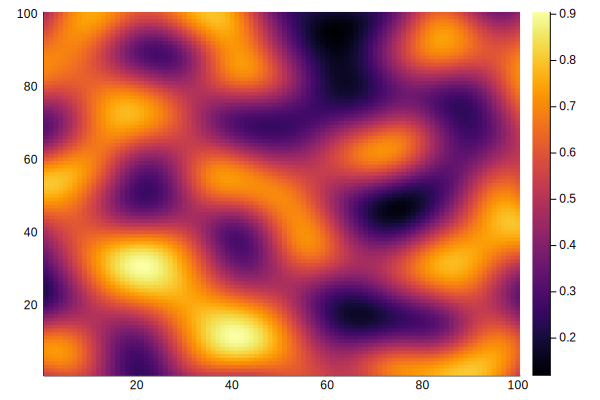

In [7]:
scale = 20
arr = Array{Float64,2}(undef, 100, 100)
for i in 1:100
    for j in 1:100
    arr[i,j] = noise(i/scale,j/scale)
    end
end
heatmap(arr)

Instead of the 2-D noise, we will use two lines of 1-D values (you can imagine those lines plotted on the 2-D noise plot). We will use two different starting positions for $x$ and $y$ so that the motion will not be the same for both, as Simplex noise is deterministic.

### Simplex random walk

In [8]:
movie = Movie(400, 600, "turtle");

nframes = 1e3
stepsize = 0.04  # How smooth it will be
pathname = "plots/2d-simplex.gif"

tx, ty = 1, 10000

function frame(scene, framenumber)
    global tx, ty
    x, y = noise(tx) * 100, noise(ty) * 100
    
    sethue("cyan")
    circle(x, y, 10, :fill)
    
    tx += stepsize
    ty += stepsize
end;

function backdrop(scene, framenumber)
    background("midnightblue")
end;

Luxor.animate(
    movie, [
        Scene(movie, backdrop, 1:nframes),
        Scene(
            movie,
            frame,
            1:nframes,
        ),
    ],
    pathname=pathname,
    creategif=true,
    framerate=60,
);
display(MIME("text/html"), "<img src=\"" * pathname * "\">")

┌ Info: Frames for animation "turtle" are being stored in directory: 
│ 	 /tmp/tmpzNi6g7
└ @ Luxor /home/suzil/.julia/packages/Luxor/PU5Pi/src/animate.jl:170
┌ Info: ... 1000 frames saved in directory:
│ 	 /tmp/tmpzNi6g7
└ @ Luxor /home/suzil/.julia/packages/Luxor/PU5Pi/src/animate.jl:192


┌ Info: GIF is: plots/2d-simplex.gif
└ @ Luxor /home/suzil/.julia/packages/Luxor/PU5Pi/src/animate.jl:207


Now our random walk looks a lot more natural instead of completely random.

Find the [notebook on GitHub](https://github.com/suzil/julia-notebooks/blob/master/Random%20Walk.ipynb).